$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\vc}[1]{\begin{pmatrix}#1_1\\#1_2\end{pmatrix}}
\newcommand{\vd}[1]{\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
\newcommand{\dd}{\mathrm{d}}
$$

##Numerical Solution to the Laplace Equation


Let's solve the Laplace equation

$$\nabla^2\,\phi=0$$

subject to boundary conditions. This equation can be solved for sufficient simply boundary condition with a very simple iterative solver. This allows to demonstrate already at a very early stage of this fluid mechanics course the *power* of computational fluid mechanics. 

To get the problem understandable for the computer we write the equation as components

$$\ppad{\phi}{x}+\ppad{\phi}{y}=0\quad .$$

The simplest way to implement this equation into an algorithm is to discretize the equation. We solve it only on a points $(x_i,y_j)$ of a mesh where $x_i=i\,\Delta x$ and $y_j=j\,\Delta y$.

We have thus to compute $\phi_{i,j}$, which demands that we discretize the Laplace operator $\nabla^2$. How are we going to do it? The approch which is working is surprisingly simple: we just express the partial derivative as finite differences. Let's start with the first derivative of $\phi$ with respect to $x$

$$\pad{\phi}{x}\approx\frac{\phi(x+\frac{1}{2}\Delta x)-\phi(x-\frac{1}{2}\Delta x)}{\Delta x}$$

Hence, the second derivative is

$$\ppad{\phi}{x}\approx\frac{1}{\Delta x} \frac{\phi(x+\Delta x)-\phi(x)-(\phi(x)-\phi(x-\Delta x))}{\Delta x}=
\frac{1}{\Delta x^2}\left[\phi(x+\Delta x)-2\phi(x)+\phi(x-\Delta x)\right]$$

To familiarize and check please repeat above calculations yourself. The expression can be written with our convenient $i,j$ notation. But before we make our life even simpler and use a homogeneous grid in $x$ and $y$-directions, $\Delta x=\Delta y$.
First we write the second derivative in $x$-direction

$$\left.\ppad{\phi}{x}\right|_{i,j}=\frac{1}{\Delta x^2}\left(\phi_{i+1,j}-2\phi_{i,j}+\phi_{i-1,j}\right)$$

The same holds for the $y$-direction:

$$\left.\ppad{\phi}{y}\right|_{i,j}=\frac{1}{\Delta x^2}\left(\phi_{i,j+1}-2\phi_{i,j}+\phi_{i,j-1}\right)$$

Now we can write the finite difference operation on $\nabla^2 \phi_{i,j}=0$ as

$$\phi_{i,j}=\frac{1}{4}\left(\phi_{i,j+1}+\phi_{i,j-1}+\phi_{i+1,j}+\phi_{i-1,j}\right)\quad .$$


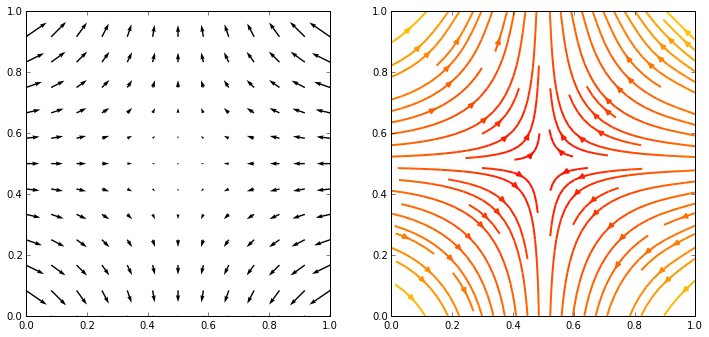

In [22]:
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

maxiter=100 #maximum number of iteration 

def solveLaplace_Jacobi(phi,deltax):
    for iter in range (maxiter):
        phin=phi.copy()
        
        #boundary conditions
        #extensional flow
        phin[0,:] = -Uwall/L#np.linspace(0,Uwall/L,n) #right
        phin[-1,:] = -Uwall/L#np.linspace(0,-Uwall/L,n) #left
        phin[:,0] = Uwall/L #bottom
        phin[:,-1] = Uwall/L #top
    
        #finite difference scheme
        phi[1:-1,1:-1]=0.25*(phin[1:-1,2:]+phin[1:-1,0:-2]+phin[2:,1:-1]+phin[0:-2,1:-1])
        
    return phi

#Main program
n=17 #number of grid cells
L=1. #length of domain 
deltax=L/n #grid spacing
phi = np.zeros((n,n)) #initialize the velocity potential
Uwall=1. #Inflow velocity

#Solve Laplace equation
phi=solveLaplace_Jacobi(phi,deltax)

#Calculate the velocity fields (gradient of phi)
u1,u2=np.gradient(phi,deltax,deltax)
#Omit the borders 
u1=u1[2:-2,2:-2]
u2=u2[2:-2,2:-2]

#setup the plot
x = y = np.linspace(0, L, n-4)
X, Y = np.meshgrid(x,y)
fig = plt.figure(figsize=(12,12), dpi=100) #figure size
ax1 = fig.add_subplot(1, 2, 1,aspect='equal') #two figures side-by-side
ax2 = fig.add_subplot(1, 2, 2,aspect='equal')

#arrow plot
ax1.quiver(X.T,Y.T,u1,u2)
#streamline plot
uabs=np.sqrt(u1**2+u2**2)
ax2.streamplot(X,Y,u1.T,u2.T,color=uabs.T, linewidth=2, cmap=plt.cm.autumn);
